# Regression Analysis

Objective: To infer why employees are leaving the oranization

In [ ]:
setwd("/Users/Thiya/Desktop/Wayne/Winter 2018/Statistical methods")
HR= read.csv(file = "HR.csv", header = T, sep = ',')

In [2]:
#Correlation Matrix
correlate_HR <- cor(HR[,1:8])
print(correlate_HR)

                      satisfaction_level last_evaluation number_project
satisfaction_level            1.00000000     0.105021214   -0.142969586
last_evaluation               0.10502121     1.000000000    0.349332589
number_project               -0.14296959     0.349332589    1.000000000
average_montly_hours         -0.02004811     0.339741800    0.417210634
time_spend_company           -0.10086607     0.131590722    0.196785891
Work_accident                 0.05869724    -0.007104289   -0.004740548
left                         -0.38837498     0.006567120    0.023787185
promotion_last_5years         0.02560519    -0.008683768   -0.006063958
                      average_montly_hours time_spend_company Work_accident
satisfaction_level            -0.020048113       -0.100866073   0.058697241
last_evaluation                0.339741800        0.131590722  -0.007104289
number_project                 0.417210634        0.196785891  -0.004740548
average_montly_hours           1.000000000      

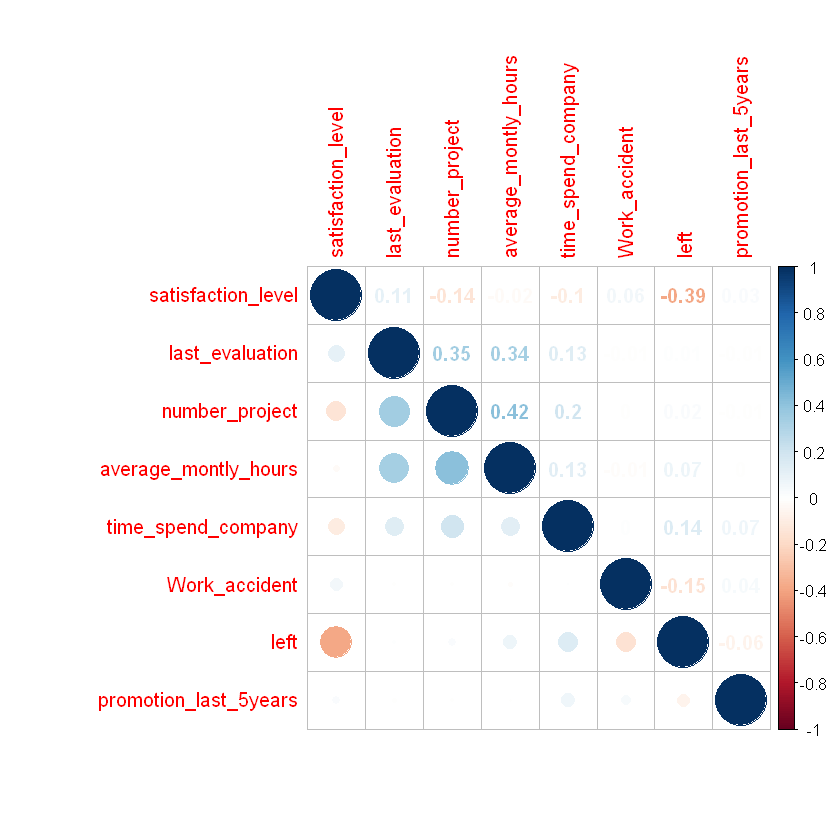

In [3]:
corrplot::corrplot.mixed(correlate_HR,lower = "circle", upper = "number", tl.pos = "lt",diag = "l")

Positively Correlated Features:
1.Number_project vs last_evaluation: 0.349333
2.Number_project vs average_montlyHours: 0.417211
3.average_Montly_Hours vs last_evaluation: 0.339742

Negatively Correlated Feature:
1.satisfaction_level vs left: -0.388375

In [59]:
model1 <- glm(left~.,data = HR,family ='binomial')
summary(model1)


Call:
glm(formula = left ~ ., family = "binomial", data = HR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2248  -0.6645  -0.4026  -0.1177   3.0688  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.4762862  0.1938373  -7.616 2.61e-14 ***
satisfaction_level    -4.1356889  0.0980538 -42.178  < 2e-16 ***
last_evaluation        0.7309032  0.1491787   4.900 9.61e-07 ***
number_project        -0.3150787  0.0213248 -14.775  < 2e-16 ***
average_montly_hours   0.0044603  0.0005161   8.643  < 2e-16 ***
time_spend_company     0.2677537  0.0155736  17.193  < 2e-16 ***
Work_accident         -1.5298283  0.0895473 -17.084  < 2e-16 ***
promotion_last_5years -1.4301364  0.2574958  -5.554 2.79e-08 ***
saleshr                0.2323779  0.1313084   1.770  0.07678 .  
salesIT               -0.1807179  0.1221276  -1.480  0.13894    
salesmanagement       -0.4484236  0.1598254  -2.806  0.00502 ** 
salesmarketing        -0.012

satisfaction_level, last_evaluation, number_project, average_montly_hours,time_spend_company,work_accident, promotion_last_5years, salary are statistically significant, since their p-values are less than 0.05

In [66]:
#Prediction
probs <- predict(model1,type = "response")
pred.lm <- rep("Down", length(probs))
pred.lm[probs > 0.5] <- "Up"
table(pred.lm,HR$left)


       
pred.lm     0     1
   Down 10614  2301
   Up     814  1270

True Prediction rate is (1270 + 10614) / (10614+2301+814+1270) = 0.7923 or 79% . 21% is the training error.

In [67]:
#Splitting the data
sample_size <- floor(0.50 * nrow(HR))
training_data <- sample(seq_len(nrow(HR)), size = sample_size)
train <- HR[training_data, ]
test <- HR[-training_data, ]
left_hr <- HR$left[-training_data]
#Logistic regression 
model2 <- glm(left~.,data = train, family = 'binomial')
summary(model2)


Call:
glm(formula = left ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2413  -0.6574  -0.4003  -0.1172   2.8128  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -1.7589821  0.2771473  -6.347 2.20e-10 ***
satisfaction_level    -4.1936851  0.1394837 -30.066  < 2e-16 ***
last_evaluation        0.7377032  0.2106665   3.502 0.000462 ***
number_project        -0.3073516  0.0304260 -10.102  < 2e-16 ***
average_montly_hours   0.0047943  0.0007284   6.582 4.64e-11 ***
time_spend_company     0.2816230  0.0223938  12.576  < 2e-16 ***
Work_accident         -1.3378015  0.1240201 -10.787  < 2e-16 ***
promotion_last_5years -1.3065571  0.3470734  -3.764 0.000167 ***
saleshr                0.0513418  0.1884150   0.272 0.785243    
salesIT               -0.0898938  0.1702440  -0.528 0.597479    
salesmanagement       -0.3408189  0.2246414  -1.517 0.129224    
salesmarketing         0.

In [68]:
#Prediction
probs <- predict(model2,test, type = "response")
pred.lm <- rep("Down", length(probs))
pred.lm[probs > 0.5] <- "Up"
table(pred.lm,left_hr)


       left_hr
pred.lm    0    1
   Down 5274 1165
   Up    449  612

True Prediction rate is (5274+612) / (5274+1165+449+612) = 0.7848 or 79% . 21% is the training error.

In [69]:
model3 <- glm(left~satisfaction_level+last_evaluation+time_spend_company+average_montly_hours+number_project,data = train, family = 'binomial')
summary(model3)


Call:
glm(formula = left ~ satisfaction_level + last_evaluation + time_spend_company + 
    average_montly_hours + number_project, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1007  -0.6875  -0.4605  -0.2464   2.4807  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.0536683  0.1646192   0.326    0.744    
satisfaction_level   -4.1993473  0.1351592 -31.070  < 2e-16 ***
last_evaluation       0.7912888  0.2023145   3.911 9.18e-05 ***
time_spend_company    0.2074145  0.0202696  10.233  < 2e-16 ***
average_montly_hours  0.0045570  0.0006961   6.547 5.89e-11 ***
number_project       -0.2905482  0.0290522 -10.001  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8251.8  on 7498  degrees of freedom
Residual deviance: 6865.3  on 7493  degrees of freedom
AIC: 6877.3

Nu

In [70]:
probs2 <- predict(model3,test,type = "response")
pred.lm2 <- rep("Down", length(probs2))
pred.lm2[probs > 0.5] <- "Up"
table(pred.lm2,left_hr)


        left_hr
pred.lm2    0    1
    Down 5274 1165
    Up    449  612

True Prediction rate is (5274 + 612) / (5274 + 612 + 449 +1165) = 0.7848 or 79% .

Boruta Algorithm- Feature Selection

In [57]:
library(Boruta)
boruta.train <- Boruta(left~., data = HR, doTrace = 2)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
After 10 iterations, +1.4 mins: 
 confirmed 9 attributes: average_montly_hours, last_evaluation, number_project, promotion_last_5years, salary and 4 more;
 no more attributes left.



In [58]:
print(boruta.train)

Boruta performed 10 iterations in 1.375515 mins.
 9 attributes confirmed important: average_montly_hours,
last_evaluation, number_project, promotion_last_5years, salary and 4
more;
 No attributes deemed unimportant.


All attributes in the dataset are confirmed important

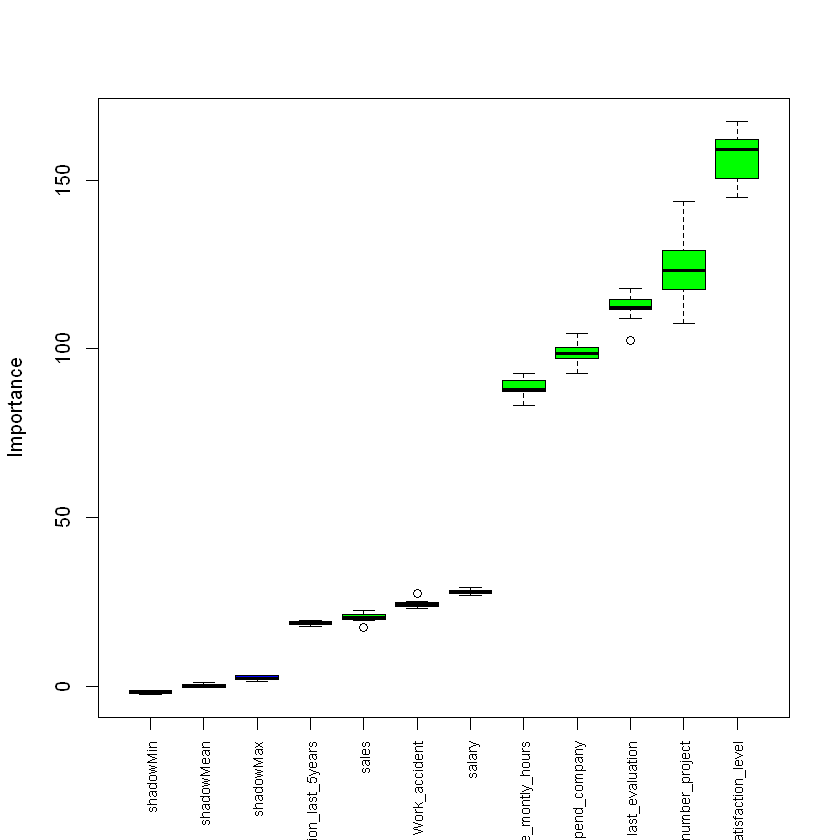

In [60]:
plot(boruta.train, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta.train$ImpHistory),function(i)
boruta.train$ImpHistory[is.finite(boruta.train$ImpHistory[,i]),i])
names(lz) <- colnames(boruta.train$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(boruta.train$ImpHistory), cex.axis = 0.7)

Eventhough Boruta indicates all the attributes are important, the attributes of high importance are satisfaction_level, number_project, last_evaluation, time_spend_company and average_monthly_hours.


Principal Component Analysis- Dimentionality reduction

In [72]:
#Considering only the numeric data
pca.Hr <- HR[,1:8]

In [73]:
#PCA 
HR_data <- prcomp(pca.Hr, center = TRUE, scale. = TRUE )
print(HR_data)

Standard deviations (1, .., p=8):
[1] 1.3641539 1.2099973 1.0298479 0.9777442 0.9195104 0.8420100 0.7915100
[8] 0.6909789

Rotation (n x k) = (8 x 8):
                               PC1        PC2         PC3          PC4
satisfaction_level     0.189561861 -0.6082581  0.14578963 -0.253499104
last_evaluation       -0.463637154 -0.3122288  0.15715943 -0.103072477
number_project        -0.557047026 -0.1225429  0.01295210  0.098583382
average_montly_hours  -0.525595871 -0.1785367  0.11339814  0.012068098
time_spend_company    -0.333951324  0.1170926 -0.44415687 -0.045699122
Work_accident          0.064439228 -0.2814044 -0.42577604  0.813156642
left                  -0.216339403  0.6163127  0.01069646  0.008161907
promotion_last_5years  0.008708814 -0.1135893 -0.74989628 -0.501867708
                              PC5         PC6         PC7         PC8
satisfaction_level    -0.32268329 -0.24332960 -0.29102170 -0.51043559
last_evaluation       -0.06471173 -0.52257837  0.54777287  0.27367838


PCA returns eight principal components as rotation.The number of principal components in rotation is equal to number of variables considered in the dataset

Warning message:
"package 'factoextra' was built under R version 3.4.3"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


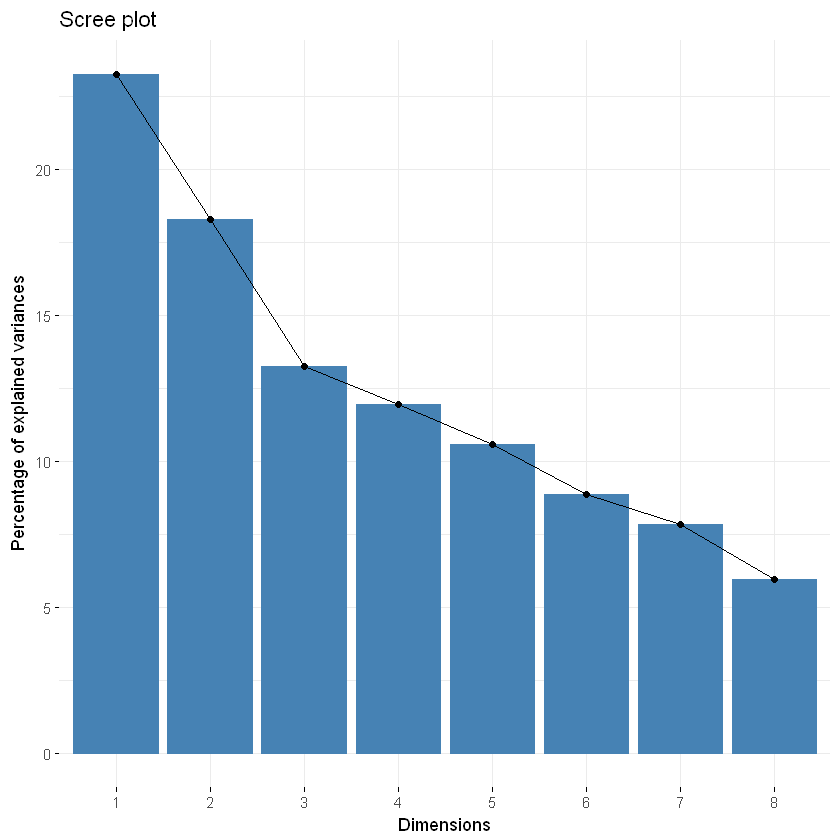

In [74]:
library(factoextra)
fviz_eig(HR_data)

PC1 explains 23% of variance ,PC2 explains 18% of variance, PC3 explains 13% of variance and so on.

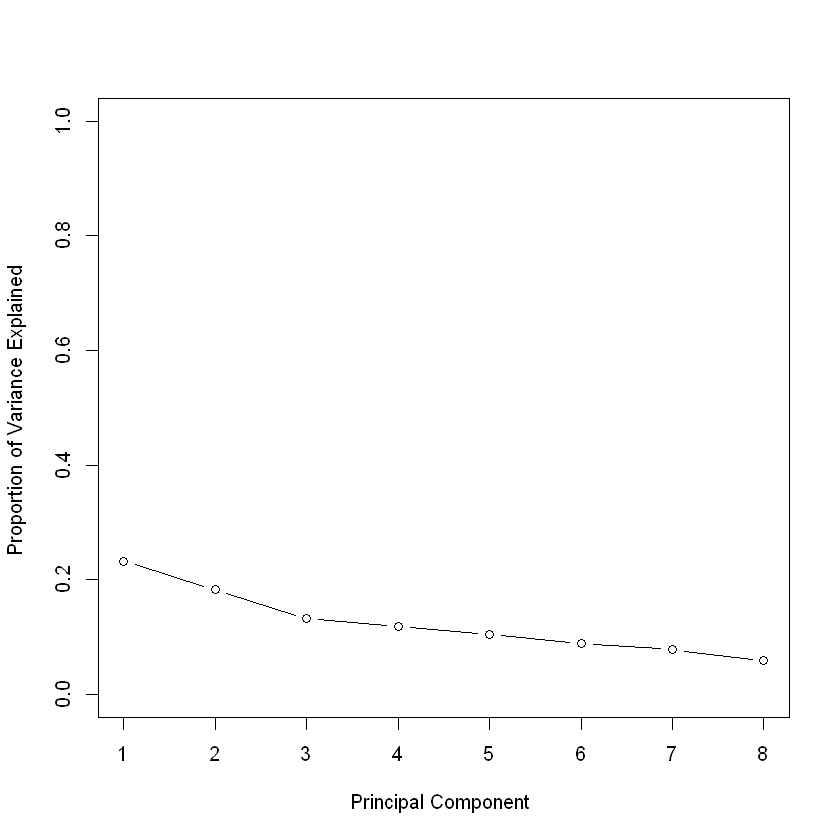

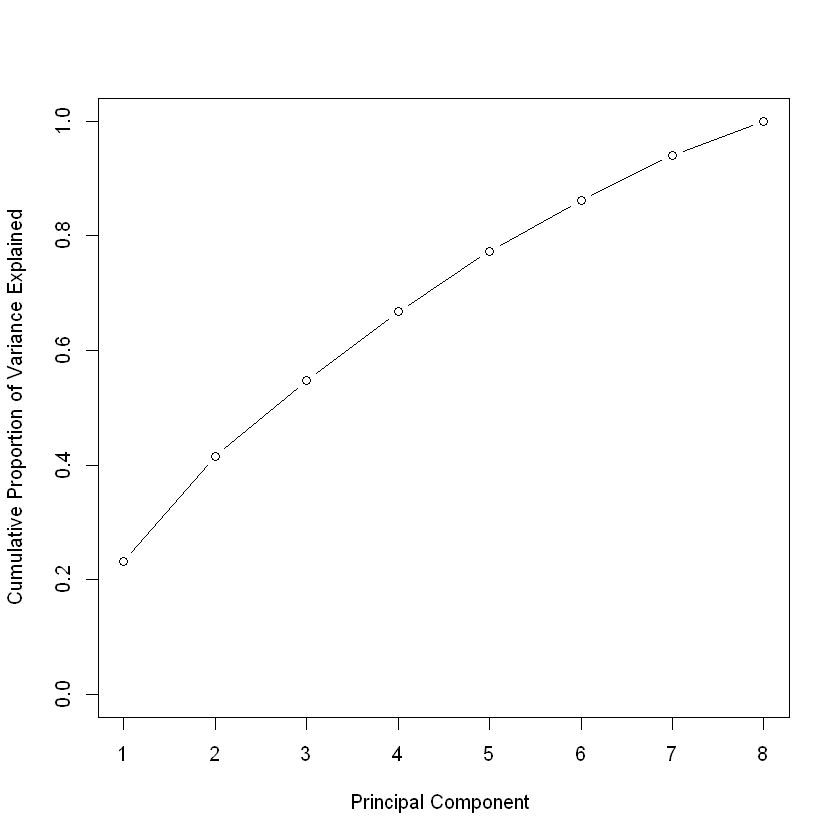

In [75]:
pca.var = HR_data$sdev ^ 2
prop.var = pca.var/sum(pca.var)
plot(prop.var , xlab="Principal Component ", ylab="Proportion of Variance Explained ", ylim=c(0,1),type = 'b')
plot(cumsum(prop.var), xlab="Principal Component ", ylab=" Cumulative Proportion of Variance Explained ", ylim=c(0,1),type = 'b')

he first plot indicates that first component has the highest variance, value around 23% while the seventh component is around 0% of variance.So it indicates we should consider the first six components. The second plot explaining the cumulative proportion of variance indicates that first seven components contribute to 95% of variance .The beneficial is that we are able to reduce the variables by losing only 5% of the information.This is the power of dimentionality reduction.

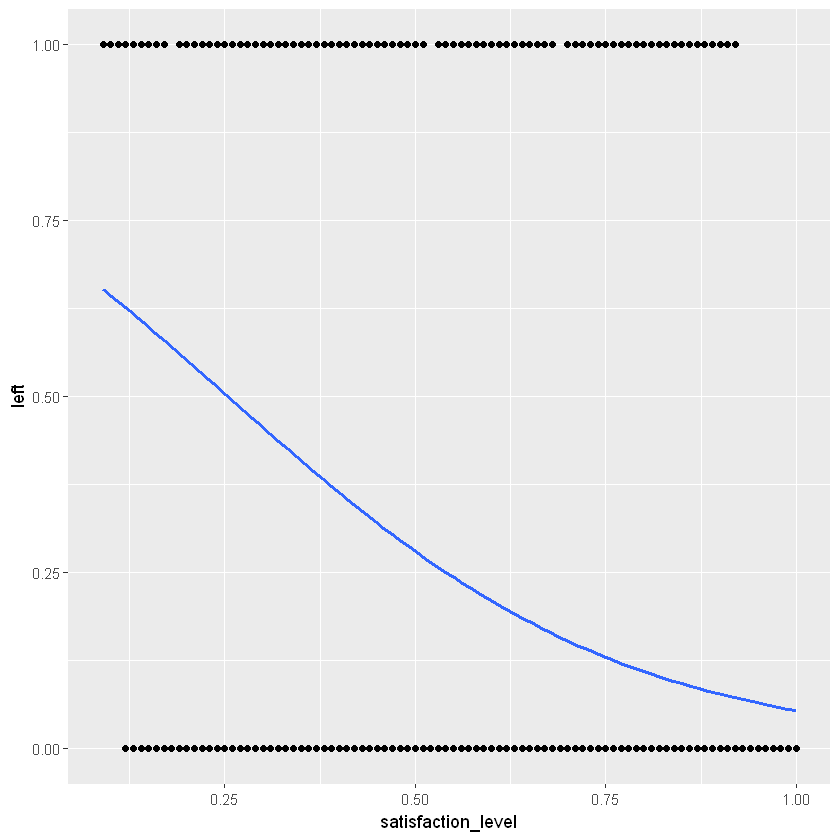

In [79]:
library("ggplot2")
ggplot(HR, aes(x=satisfaction_level, y=left)) +geom_point() +geom_smooth(method = "glm", method.args = list(family = "binomial"),se = FALSE)


The employees with low satisfaction_level tend to leave the organization. As satisfaction_level increases, the employees tend to stay in the organization

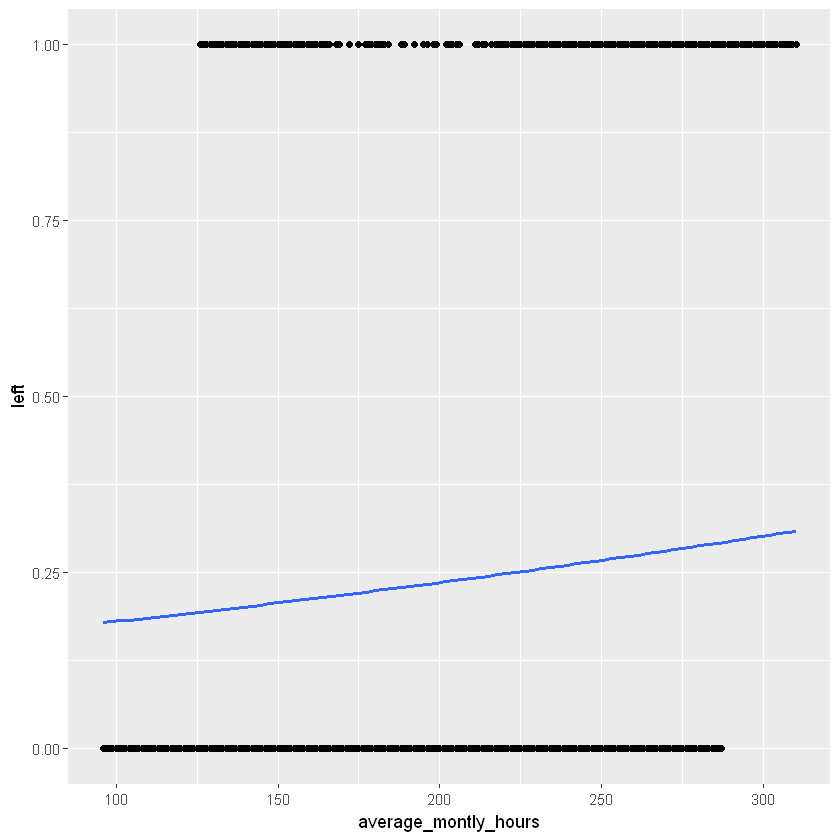

In [82]:
ggplot(HR, aes(x=average_montly_hours, y=left)) +geom_point() +geom_smooth(method = "glm", method.args = list(family = "binomial"),se = FALSE) 

Employees working for more number of hours per month(250-300 hours) tend to leave the organization than the employees working around 100-150 hours on average per month

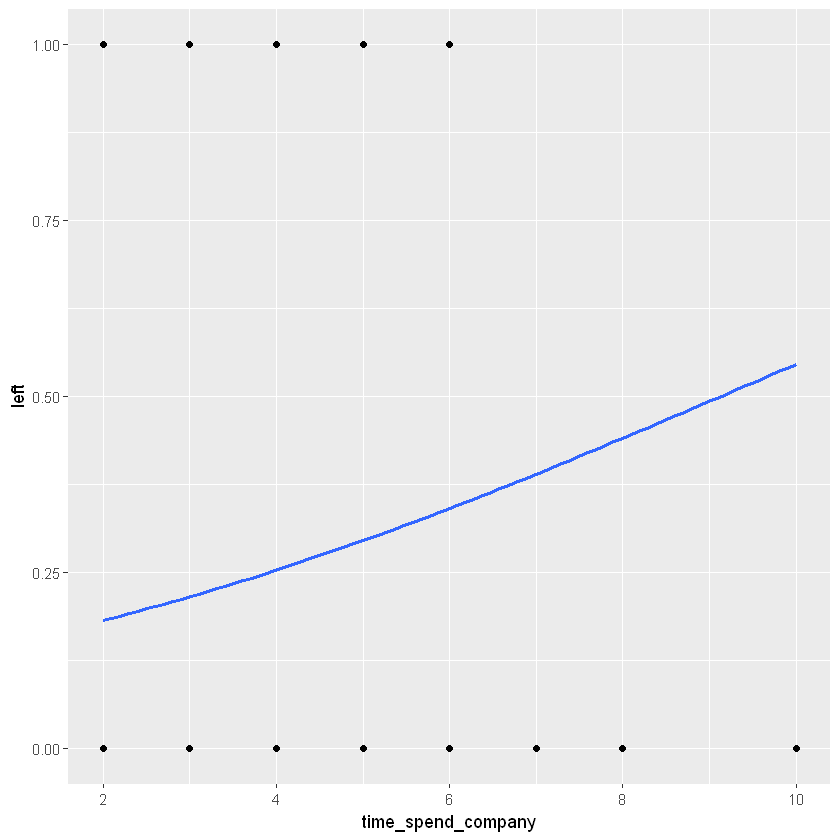

In [83]:
ggplot(HR, aes(x=time_spend_company, y=left)) +geom_point() +geom_smooth(method = "glm", method.args = list(family = "binomial"),se = FALSE) 

In [ ]:
The more number of experience the employee gain, there are more chances for the employee to leave the organization

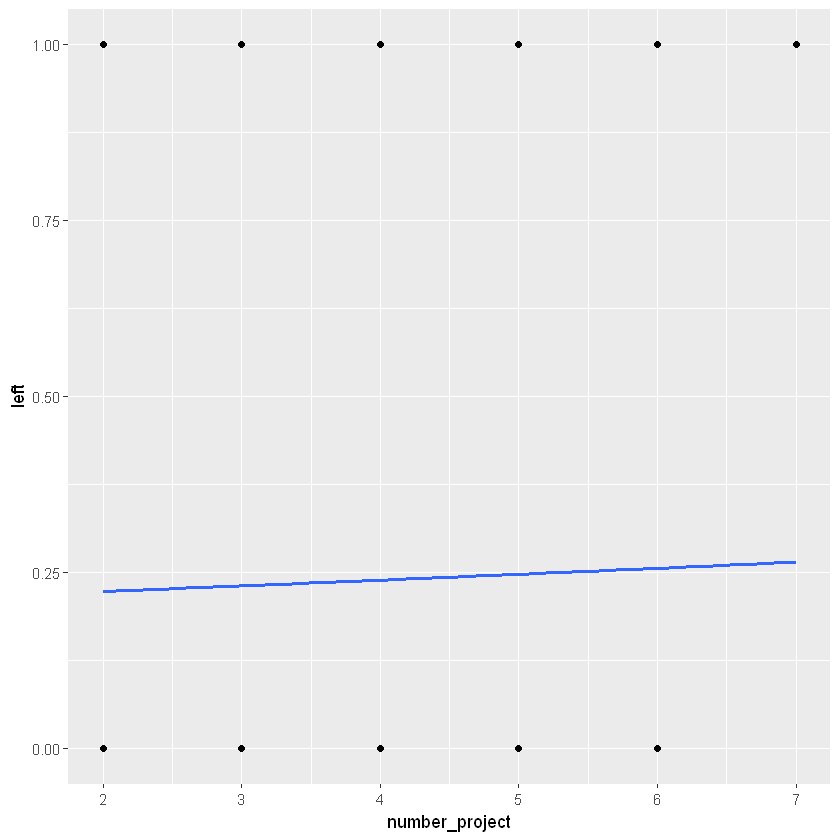

In [84]:
ggplot(HR, aes(x=number_project, y=left)) +geom_point() +geom_smooth(method = "glm", method.args = list(family = "binomial"),se = FALSE)

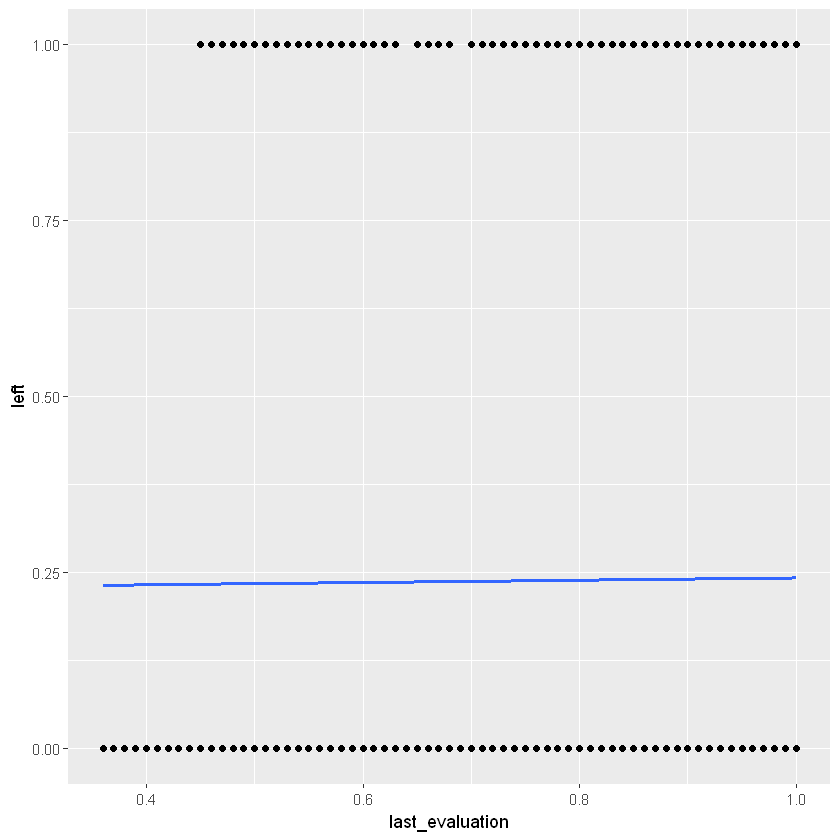

In [85]:
ggplot(HR, aes(x=last_evaluation, y=left)) +geom_point() +geom_smooth(method = "glm", method.args = list(family = "binomial"),se = FALSE)

In [86]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.4.3"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.4.2"Loaded glmnet 2.0-13



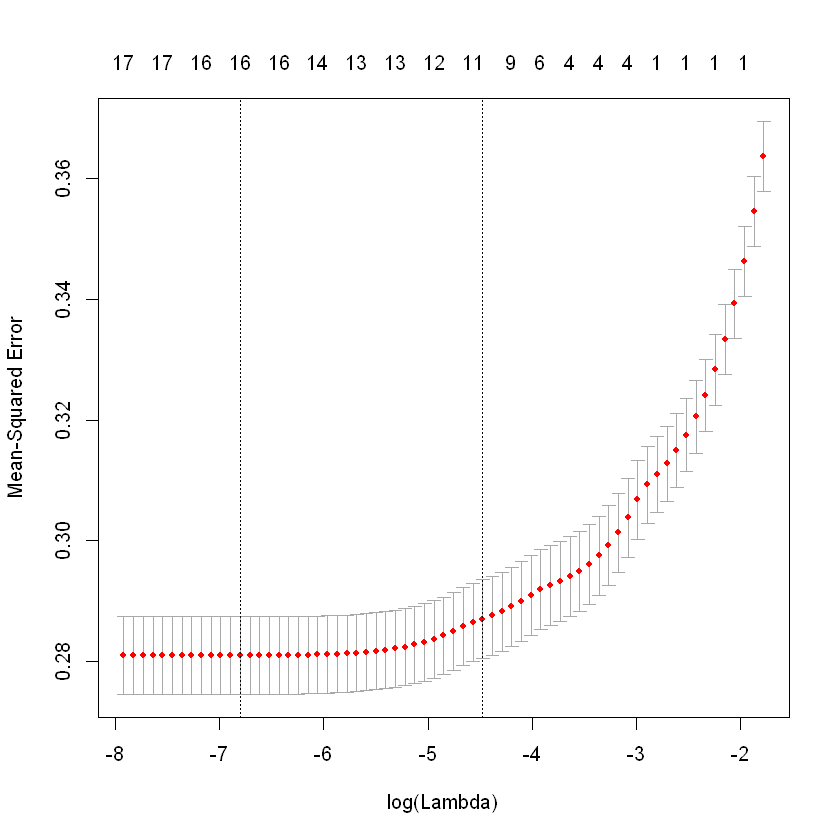

In [93]:
x <- model.matrix(left~.,train)
y <- as.matrix(train[,7])
cv.out <- cv.glmnet(x,y,alpha=1,family='binomial',type.measure = 'mse' )
plot(cv.out)

In [96]:
lambda_min <- cv.out$lambda.min
lambda_1se <- cv.out$lambda.1se
coef(cv.out,s=lambda_1se)

20 x 1 sparse Matrix of class "dgCMatrix"
                                  1
(Intercept)            0.0082176093
(Intercept)            .           
satisfaction_level    -3.5333279383
last_evaluation        0.0125510653
number_project        -0.1085148664
average_montly_hours   0.0020927696
time_spend_company     0.1790271339
Work_accident         -0.9235525833
promotion_last_5years -0.4042109902
saleshr                .           
salesIT                .           
salesmanagement       -0.1453607338
salesmarketing         .           
salesproduct_mng       .           
salesRandD            -0.1428652219
salessales             .           
salessupport           .           
salestechnical         0.0009255119
salarylow              0.5538181857
salarymedium           .           

The output shows that only those variables that we had determined to be significant on the basis of p-values have non-zero coefficients. The coefficients of all other variables have been set to zero by the algorithm! Lasso has reduced the complexity of the fitting function massively

In [102]:
x_test <- model.matrix(left~.,test)
lasso_prob <- predict(cv.out,newx = x_test,s=lambda_1se,type='response')
lasso_predict <- rep('neg',nrow(test))
lasso_predict[lasso_prob>.5] <- 'pos'
table(pred=lasso_predict,true=test$left)

     true
pred     0    1
  neg 5344 1326
  pos  379  451

Conclusion:
The employees having low satisfaction_level leave the organization.
The employees working for more number of hours on average per month leave the organization.
The employees with more number of experience, leave the organization.

Experience:
First time to work in LASSO in R. 
Was able to interpret how the model works.
Made me to think how a dataset can be worked on with various fuctions.
Was able to understand when it is possible to use linear regression and logistic regression.